In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score

from keras import Model
from keras.layers import Input,Dense
from keras.regularizers import l2

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0, 0.5, 'No. of Observations')

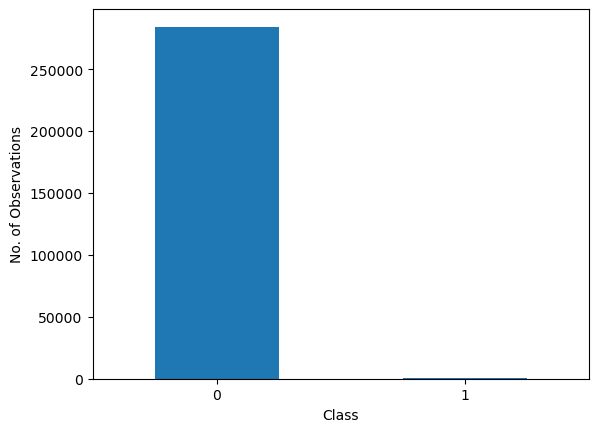

In [5]:
count_classes = pd.value_counts(dataset['Class'],sort = True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset['Class'].unique())
plt.xlabel('Class')
plt.ylabel('No. of Observations')

In [6]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [7]:
raw_data = dataset.values

labels = raw_data[:,-1]
data = raw_data[:,0:-1]

train_data,test_data,train_labels,test_labels = train_test_split(
    data,labels,test_size=0.2,random_state=4)

train_labels.shape

(227845,)

In [8]:
train_labels = train_labels.astype(bool) 
test_labels = test_labels.astype(bool)

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data  = train_data[train_labels]
fraud_test_data  = test_data[test_labels]

In [9]:
input_dim = normal_train_data.shape[1]
encoding_dim = 14
hidden_dim1 = (encoding_dim/2)
hidden_dim2 = 4
learning_rate = 1e-7

#Input Layer
input_layer = Input(shape=(input_dim))

#encoder
encoder = Dense(encoding_dim,activation='tanh',activity_regularizer = l2(learning_rate))(input_layer)
encoder = Dense(hidden_dim1,activation='relu')(encoder)
encoder = Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)
                
#decoder
decoder = Dense(hidden_dim1,activation='relu')(encoder)
decoder = Dense(encoding_dim,activation='relu')(decoder)
decoder = Dense(input_dim,activation='tanh')(decoder)
                
#Autoencoder
autoencoder = Model(input_layer,decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 14)                112       
                                                                 
 dense_5 (Dense)             (None, 30)                450   

In [10]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [11]:
history = autoencoder.fit(normal_train_data,normal_train_data,validation_data=(normal_test_data,normal_test_data),epochs=10)

Epoch 1/10
7108/7108 [==============================] - 9s 1ms/step - loss: 0.7608 - accuracy: 0.3831 - val_loss: 0.7680 - val_accuracy: 0.4013
Epoch 2/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.7046 - accuracy: 0.4099 - val_loss: 0.7531 - val_accuracy: 0.4127
Epoch 3/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.6932 - accuracy: 0.4126 - val_loss: 0.7438 - val_accuracy: 0.4148
Epoch 4/10
7108/7108 [==============================] - 9s 1ms/step - loss: 0.6862 - accuracy: 0.4148 - val_loss: 0.7398 - val_accuracy: 0.4191
Epoch 5/10
7108/7108 [==============================] - 9s 1ms/step - loss: 0.6825 - accuracy: 0.4171 - val_loss: 0.7368 - val_accuracy: 0.4191
Epoch 6/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.6798 - accuracy: 0.4185 - val_loss: 0.7332 - val_accuracy: 0.4182
Epoch 7/10
7108/7108 [==============================] - 8s 1ms/step - loss: 0.6775 - accuracy: 0.4206 - val_loss: 0.7365 - val_accuracy:

In [28]:
predictions = autoencoder.predict(test_data)

1781/1781 [==============================] - 1s 717us/step


In [31]:
mse  = np.mean(np.power(predictions-test_data,2),axis=1)
error_df = pd.DataFrame({'Reconstruction_Error':mse,'True_Class':test_labels})
error_df

,Reconstruction_Error,True_Class
0,0.162083,False
1,0.106913,False
2,0.092869,False
3,0.175434,False
4,0.169326,False
...,...,...
56957,1.996800,False
56958,0.395494,False
56959,0.235430,False
56960,0.098636,False


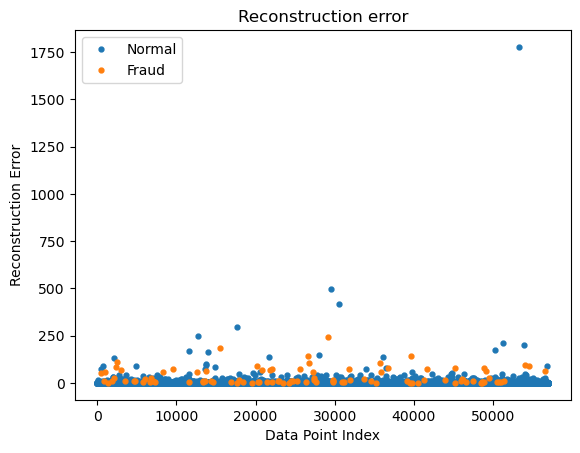

In [32]:
threshold_fixed = 0.50
groups = error_df.groupby('True_Class')
fig,ax = plt.subplots()
for name,group in groups:
    ax.plot(group.index,group.Reconstruction_Error,marker='o',ms=3.5,linestyle='',label = 'Fraud' if name==1 else 'Normal')
ax.legend()
plt.title('Reconstruction error')
plt.xlabel('Data Point Index')
plt.ylabel('Reconstruction Error')
plt.show()

In [33]:
pred_y = [1 if e>threshold_fixed else 0 for e in error_df.Reconstruction_Error.values]
error_df['pred'] = pred_y
error_df

,Reconstruction_Error,True_Class,pred
0,0.162083,False,0
1,0.106913,False,0
2,0.092869,False,0
3,0.175434,False,0
4,0.169326,False,0
...,...,...,...
56957,1.996800,False,1
56958,0.395494,False,0
56959,0.235430,False,0
56960,0.098636,False,0


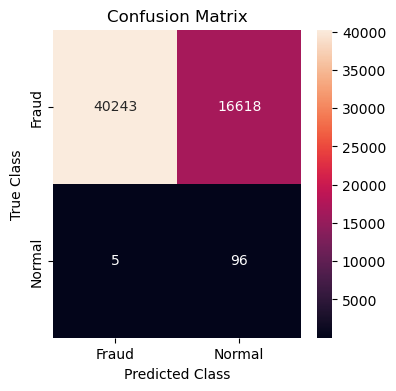

In [34]:
Labels = ["Fraud","Normal"]
conf_matrix = confusion_matrix(error_df.True_Class,error_df.pred)
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix,xticklabels = Labels,yticklabels= Labels,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

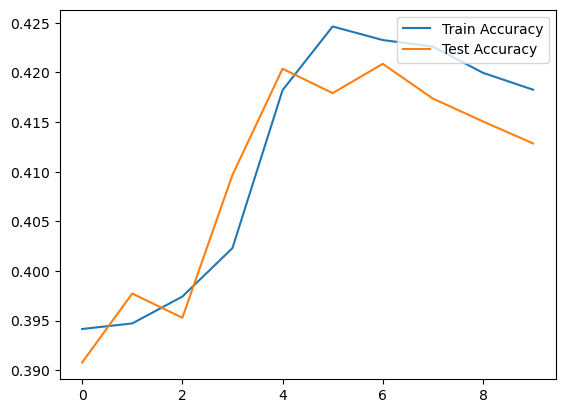

In [37]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend(loc='upper right')
plt.show()

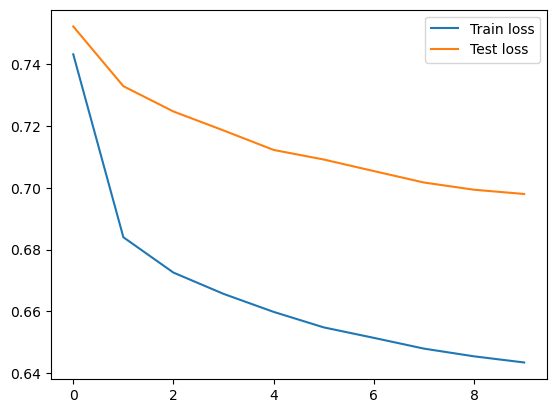

In [39]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.legend(loc='upper right')
plt.show()